In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

## Data Eploration

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
print('Classes to predict :',digits.target_names)

Classes to predict : [0 1 2 3 4 5 6 7 8 9]


In [ ]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.shape

(1797, 64)

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df['target'] = digits.target
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


<Figure size 432x288 with 0 Axes>

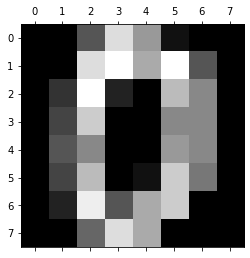

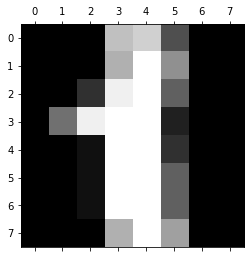

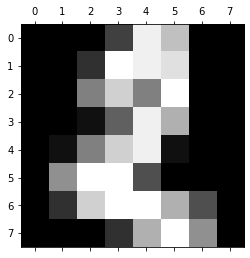

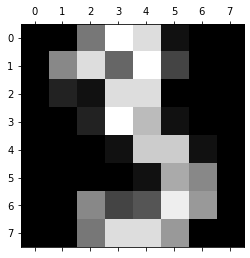

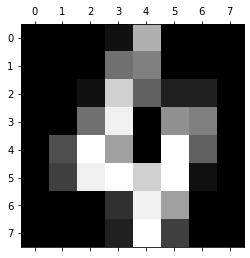

In [ ]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

## Feature Selection

In [ ]:
X = df.drop('target',axis='columns')
y = df.target

## Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
# define min max scaler **
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

## Splitting into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

# Decision Tree

## Using the default criterion (GINI)

In [ ]:
#Importing model from sklearn
from sklearn.tree import DecisionTreeClassifier

#Fitting the Model
clf_std1=DecisionTreeClassifier(max_depth=10,criterion='gini',random_state=42)
clf_std1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred=clf_std1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy score on train data (using Default criterion as gini):',accuracy_score(y_true=y_train,y_pred=clf_std1.predict(X_train)))
print('Accuracy score on test data (using Default criterion as gini):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using Default criterion as gini): 0.9686847599164927
Accuracy score on test data (using Default criterion as gini): 0.8527777777777777


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.83      0.76      0.79        33
           3       0.81      0.85      0.83        34
           4       0.82      0.89      0.85        46
           5       0.87      0.85      0.86        47
           6       0.87      0.94      0.90        35
           7       0.86      0.88      0.87        34
           8       0.85      0.77      0.81        30
           9       0.83      0.88      0.85        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



**Hyper Tuning to increase the accuracy**

In [ ]:
clf_std1=DecisionTreeClassifier(min_samples_split=20)
clf_std1.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20)

In [ ]:
print('Accuracy score on train data (using min_samples_split):',accuracy_score(y_true=y_train,y_pred=clf_std1.predict(X_train)))
print('Accuracy score on test data (using min_samples_split):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using min_samples_split): 0.8997912317327766
Accuracy score on test data (using min_samples_split): 0.8527777777777777


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[29,  0,  0,  0,  3,  1,  0,  0,  0,  0],
       [ 0, 22,  1,  0,  2,  0,  0,  1,  1,  1],
       [ 0,  1, 25,  3,  0,  1,  1,  1,  1,  0],
       [ 0,  0,  1, 29,  0,  0,  1,  1,  1,  1],
       [ 0,  0,  1,  0, 41,  1,  2,  1,  0,  0],
       [ 0,  0,  1,  0,  1, 40,  1,  0,  0,  4],
       [ 1,  0,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 30,  0,  1],
       [ 0,  2,  1,  1,  1,  2,  0,  0, 23,  0],
       [ 0,  0,  0,  2,  1,  1,  0,  1,  0, 35]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.83      0.76      0.79        33
           3       0.81      0.85      0.83        34
           4       0.82      0.89      0.85        46
           5       0.87      0.85      0.86        47
           6       0.87      0.94      0.90        35
           7       0.86      0.88      0.87        34
           8       0.85      0.77      0.81        30
           9       0.83      0.88      0.85        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



Text(42.0, 0.5, 'Truth')

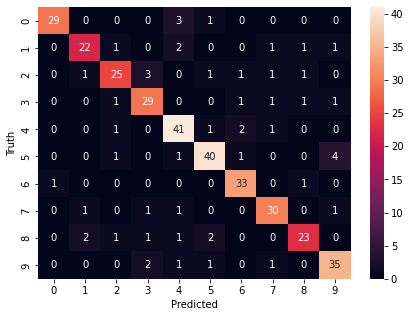

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The accuracy before hyper parameter tuning was 85 and after hyper tuning still remained 85 . 

## Using Entropy as Criterion 

In [ ]:
clf_std2=DecisionTreeClassifier(max_depth=10,criterion='entropy',random_state=42)
clf_std2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [ ]:
y_pred=clf_std2.predict(X_test)

In [ ]:
print('Accuracy score on train data (using criterion as entropy):',accuracy_score(y_true=y_train,y_pred=clf_std2.predict(X_train)))
print('Accuracy score on test data (using criterion as entropy):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using criterion as entropy): 0.9986082115518441
Accuracy score on test data (using criterion as entropy): 0.8944444444444445


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        28
           2       0.84      0.79      0.81        33
           3       0.89      0.91      0.90        34
           4       0.82      0.89      0.85        46
           5       0.96      0.96      0.96        47
           6       0.91      0.91      0.91        35
           7       0.83      0.85      0.84        34
           8       0.89      0.83      0.86        30
           9       0.95      0.90      0.92        40

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360



**Hyper Tuning**

In [ ]:
clf_std2=DecisionTreeClassifier(min_samples_split=25,criterion='entropy',)
clf_std2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=25)

In [ ]:
print('Accuracy score on train data (using min_samples_split):',accuracy_score(y_true=y_train,y_pred=clf_std2.predict(X_train)))
print('Accuracy score on test data (using min_samples_split):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using min_samples_split): 0.9109255393180237
Accuracy score on test data (using min_samples_split): 0.8944444444444445


In [ ]:
cm2=confusion_matrix(y_test,y_pred)
cm2

array([[31,  0,  0,  0,  1,  0,  0,  1,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  1, 26,  1,  1,  0,  0,  2,  2,  0],
       [ 0,  1,  2, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0, 41,  1,  2,  1,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0, 32,  0,  1,  0],
       [ 1,  0,  0,  0,  4,  0,  0, 29,  0,  0],
       [ 0,  0,  1,  2,  0,  1,  0,  1, 25,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  1,  0, 36]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        28
           2       0.84      0.79      0.81        33
           3       0.89      0.91      0.90        34
           4       0.82      0.89      0.85        46
           5       0.96      0.96      0.96        47
           6       0.91      0.91      0.91        35
           7       0.83      0.85      0.84        34
           8       0.89      0.83      0.86        30
           9       0.95      0.90      0.92        40

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360



Text(42.0, 0.5, 'Truth')

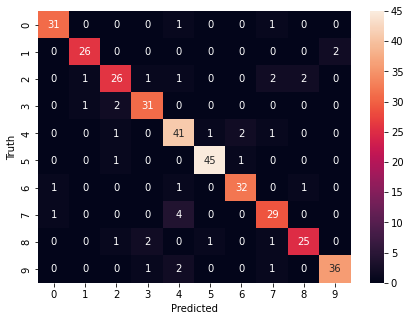

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm2, annot=True);
plt.xlabel('Predicted')
plt.ylabel('Truth')

The accuracy after using Entropy as  the criterion is 89. 

## Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_leaf_nodes' : list(range(2,50)),
          'min_samples_split' : [2,3,4],
          'min_samples_leaf' : list(range(5,20)),
          'criterion' : ['entropy','gini']}

grid_search_cv=GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=10)

grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=49,
                       min_samples_leaf=6, random_state=42)

In [ ]:
y_pred = grid_search_cv.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print(test_accuracy)

In [ ]:
clf_cv=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=49,min_samples_leaf=6, random_state=42)

clf_cv.fit(X_train,y_train)

#prediction
y_pred=clf_cv.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8694444444444445

In [ ]:
print('Accuracy score on train data (using grid search cv):',accuracy_score(y_true=y_train,y_pred=clf_cv.predict(X_train)))
print('Accuracy score on test data (using grid search cv):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using grid search cv): 0.9095337508698678
Accuracy score on test data (using grid search cv): 0.8694444444444445


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[30,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0, 25,  1,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  2, 24,  1,  1,  2,  0,  1,  2,  0],
       [ 0,  2,  1, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  1, 40,  0,  1,  0,  1,  1],
       [ 0,  1,  0,  1,  0, 44,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  0, 32,  0,  0,  0],
       [ 1,  3,  0,  0,  1,  0,  0, 27,  0,  2],
       [ 0,  0,  3,  2,  0,  1,  0,  0, 24,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  2,  0, 36]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.68      0.89      0.77        28
           2       0.83      0.73      0.77        33
           3       0.84      0.91      0.87        34
           4       0.85      0.87      0.86        46
           5       0.94      0.94      0.94        47
           6       0.94      0.91      0.93        35
           7       0.90      0.79      0.84        34
           8       0.89      0.80      0.84        30
           9       0.88      0.90      0.89        40

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.88      0.87      0.87       360



After Using GRid search we can conclude that Entropy is the best criterion for tnis model and the accuracy is 87% 

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
model.score(X_test,y_test)

0.9694444444444444

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 32,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0, 38]])

Text(69.0, 0.5, 'truth')

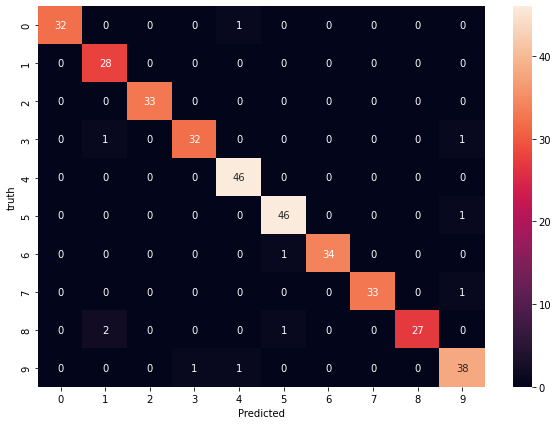

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.90      1.00      0.95        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.90      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



The accuracy after applying Random Forest is 97% 

## Grid search CV

In [ ]:
param_grid = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [ ]:
y_pred = CV_rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print(test_accuracy)

0.975


In [ ]:
rfc1=RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [ ]:
y_pred=rfc1.predict(X_test)

In [ ]:
print('Accuracy score on train data (using grid search cv):',accuracy_score(y_true=y_train,y_pred=rfc1.predict(X_train)))
print('Accuracy score on test data (using grid search cv):',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy score on train data (using grid search cv): 1.0
Accuracy score on test data (using grid search cv): 0.9722222222222222


In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  0.9722222222222222


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.92      0.98      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.90      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



After applying Grid Search CV to our Random Forest Model , we got to the conclusion that Entropy is the best criterion with 97% accuracy . 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)

0.9722222222222222

In [ ]:
knn.score(X_train,y_train)

0.9770354906054279

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 32,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 37]])

Text(42.0, 0.5, 'Truth')

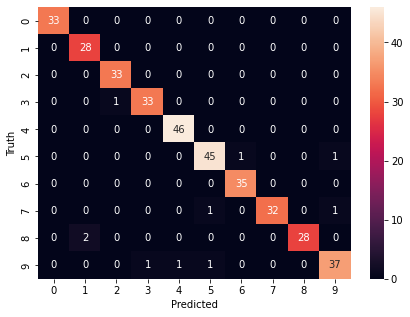

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'metric':['euclidean','minkowski']}

In [ ]:
grid_search_cv = GridSearchCV (KNeighborsClassifier(),params)

In [ ]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
grid_search_cv.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
grid_search_cv.score(X_train,y_train)

0.9874739039665971

In [ ]:
grid_search_cv.score(X_test,y_test)

0.9694444444444444

In [ ]:
knn= KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
knn.score(X_train,y_train)

0.9874739039665971

In [ ]:
knn.score(X_test,y_test)

0.9694444444444444

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  1, 36]])

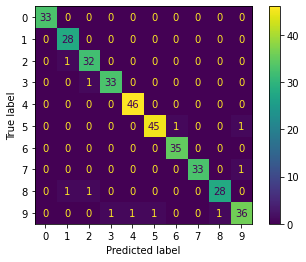

In [ ]:
plot_confusion_matrix(knn, X_test, y_test) 

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



After applying the KNN algorithm to our dataset , we got 97% accuracy . 

# Conlcusion

1) Decision Tree 

 Decision Tree gave us entropy as the best criterion . 
 Here we got the accuracy for train set 0.90 and for test set 0.86 (Overfitting model)
 The F1 score is 0.87


2) Random Forest 
Random Forest also gave us entropy as the best criterion with 1 as the accuracy for train set and 0.97 accuracy for test set. The f1 score was 0.97

3)KNN
KNN showed best euclidean as the best metric with 0.98 as the accuracy for train set and 0.96 aacuracy for the test set. 
The f1 score is 0.97. 


# Final Conlcusion 

From all the observations we can conlcude that 
# Random Forest is the best Algorithm for this data set because it gives us generalized model and best accuracy . 

### KNN also gives us generalized model and 97% f1 score but it is not reliable as it gives reslt by according to its nearest values , 

## Hence Random Forest is the Best Algorithm.